In [1]:
#step 4
import pandas as pd
import json
import urllib.parse
import requests as rq
import base64
import geocoder
import pandas as pd
import networkx as nx
import geopandas as gpd
import osmnx as ox
import folium
from shapely.geometry import Point, Polygon
from IPython.display import Image
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

city = "Barcelona, Barcelona, Spain"
location = geocoder.arcgis(city)
latitude = location.lat
longitude = location.lng

%matplotlib inline
ox.__version__

'1.4.0'

In [2]:
# Receive OSM data of heritage objects
place_name = "Barcelona, Catalonia, Spain"
# Define the historic tags to search for
historic_tags = ['castle', 'church', 'building', 'castle_wall', 'aqueduct', 'archaeological_site', 
                 'city_gate', 'citywalls', 'fort', 'monastery', 'tower', 'yes']
# Fetch the OSM geometries with the specified historic tags
gdfx = ox.geometries_from_place(place_name, tags={'historic': historic_tags})
m = folium.Map(location=[gdfx['geometry'].centroid.y.mean(), gdfx['geometry'].centroid.x.mean()], zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(m)
folium.GeoJson(gdfx).add_to(m)
m

C:\Users\rromu\AppData\Local\Temp\ipykernel_8176\2146804676.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[gdfx['geometry'].centroid.y.mean(), gdfx['geometry'].centroid.x.mean()], zoom_start=13)


In [7]:
gdfx.to_csv('C:/WORK_IAAC/submissions/Data Science III/datascience_III_src/heritage_BCN.csv', index=False)

In [65]:
# Filter the geometries to include only the points
points_gdfx = gdfx[gdfx.geometry.type == 'Point']

# Create a Folium map centered at the mean coordinates of the points
m = folium.Map(location=[points_gdfx['geometry'].centroid.y.mean(), points_gdfx['geometry'].centroid.x.mean()], zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(m)
folium.GeoJson(points_gdfx).add_to(m)
m

C:\Users\rromu\AppData\Local\Temp\ipykernel_8176\3128983306.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[points_gdfx['geometry'].centroid.y.mean(), points_gdfx['geometry'].centroid.x.mean()], zoom_start=13)


In [66]:
# Filter the geometries to include only the points
polygons_gdfx = gdfx[gdfx.geometry.type == 'Polygon']

# Create a Folium map centered at the mean coordinates of the points
m = folium.Map(location=[polygons_gdfx['geometry'].centroid.y.mean(), polygons_gdfx['geometry'].centroid.x.mean()], zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(m)
folium.GeoJson(polygons_gdfx).add_to(m)
m

C:\Users\rromu\AppData\Local\Temp\ipykernel_8176\2311582636.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[polygons_gdfx['geometry'].centroid.y.mean(), polygons_gdfx['geometry'].centroid.x.mean()], zoom_start=13)


In [138]:
points_gdfx.to_file('C:/WORK_IAAC/submissions/Data Science III/datascience_III_src/heritage_points.geojson', driver='GeoJSON')

In [169]:
polygons_gdfx.set_crs(crs='EPSG:25831', allow_override=True)
polygons_gdfx.to_csv('C:/WORK_IAAC/submissions/Data Science III/datascience_III_src/heritage_polygons.csv', index=False)

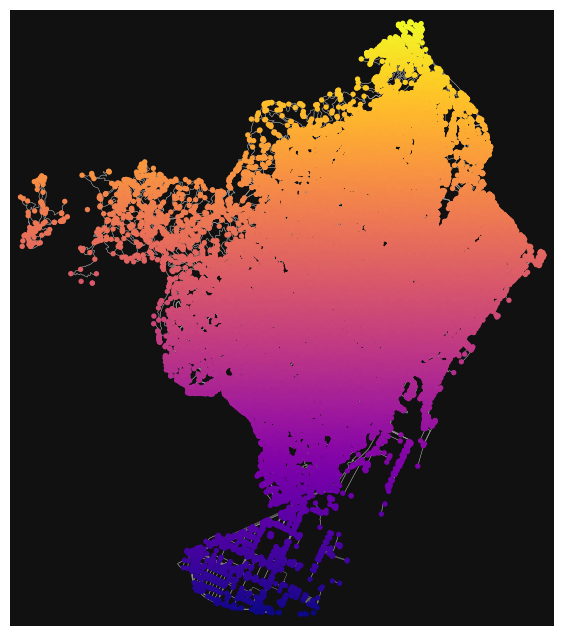

In [5]:
#get edges for isochrones
G = ox.graph_from_place(city, simplify=True, retain_all=True, network_type="all")
nc = ox.plot.get_node_colors_by_attr(G, attr="y", cmap="plasma")
fig, ax = ox.plot_graph(G, node_color=nc, edge_linewidth=0.3)

In [67]:
#find origins of isochrones by nearest points in osm
points = points_gdfx
# points.crs = 25831
points['longitude'] = points['geometry'].apply(lambda point: point.x)
points['latitude'] = points['geometry'].apply(lambda point: point.y)
heritagepoint = list(zip(points['longitude'], points['latitude']))
lat_origin, lon_origin = heritagepoint[0], heritagepoint[1]
nearest_nodes = []
for row in heritagepoint:
    lon = row[0]  # Assuming the longitude is in the first element of each row
    lat = row[1]  # Assuming the latitude is in the second element of each row
    nearest_node, distance = ox.nearest_nodes(G=G, X=lon, Y=lat, return_dist=True)
    nearest_nodes.append((nearest_node, distance))

C:\Users\rromu\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\rromu\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [68]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
print(gdf_nodes.shape, gdf_edges.shape)

(78428, 6) (221157, 20)


C:\Users\rromu\AppData\Local\Temp\ipykernel_8176\1981489395.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffers = points.geometry.buffer(b)
C:\Users\rromu\AppData\Local\Temp\ipykernel_8176\1981489395.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffers2 = polygons_gdfx.geometry.buffer(b)


epsg:4326 epsg:4326 epsg:4326


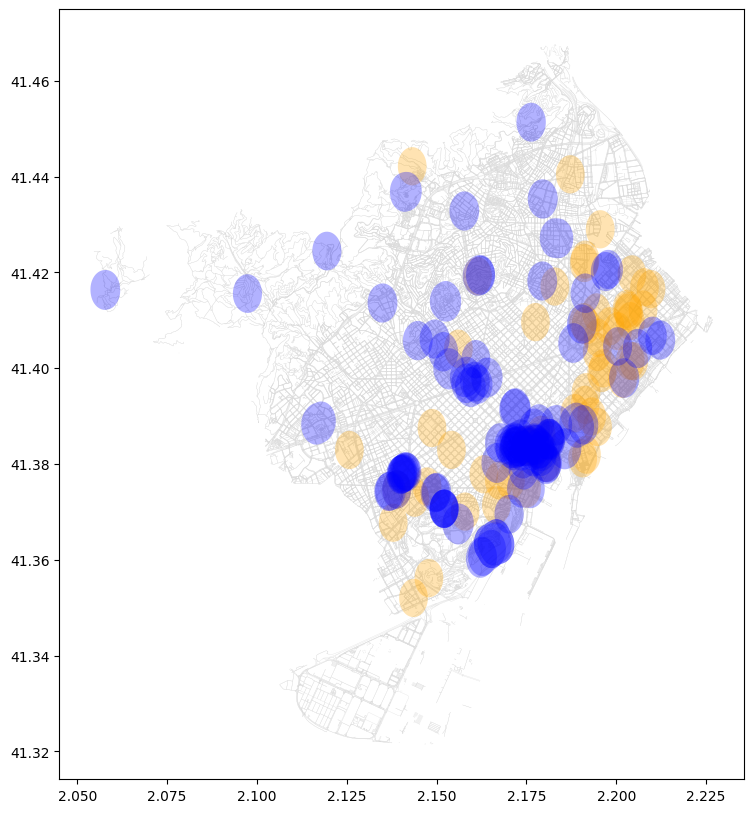

In [69]:
#make buffers 400m radius, approxamately = 5 min walk (416m)

b = 0.004
buffers = points.geometry.buffer(b)
buffers2 = polygons_gdfx.geometry.buffer(b)
fig, ax = plt.subplots(figsize=(10, 10))
buffers.plot(ax=ax, color='orange', alpha=0.3, zorder=2)
buffers2.plot(ax=ax, color='blue', alpha=0.3, zorder=3)
gdf_edges.plot(ax=ax, color='gainsboro', linewidth=0.2, zorder=1)
print(gdf_edges.crs, buffers.crs, buffers2.crs)
plt.show()

In [41]:
bf1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 56 entries, ('node', 209135160) to ('node', 10134882717)
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   0         56 non-null     geometry
 1   geometry  56 non-null     geometry
dtypes: geometry(2)
memory usage: 6.7+ KB


In [40]:
bf1 = gpd.GeoDataFrame(buffers, geometry = buffers)
bf2 = gpd.GeoDataFrame(buffers2, geometry = buffers2)
fig, ax = plt.subplots(figsize=(10, 10))
bf1.dissolve(dropna = True).plot(ax=ax, color='orange', alpha=0.3, zorder=2)
bf2.dissolve(dropna = True).plot(ax=ax, color='blue', alpha=0.3, zorder=3)
gdf_edges.plot(ax=ax, color='gainsboro', linewidth=0.2, zorder=1)
print(gdf_edges.crs, bf1.crs, bf2.crs)
plt.show() 

SyntaxError: invalid syntax (3782988503.py, line 3)

In [42]:
#make set for isochrones' centers
first_values = [tup[0] for tup in nearest_nodes]

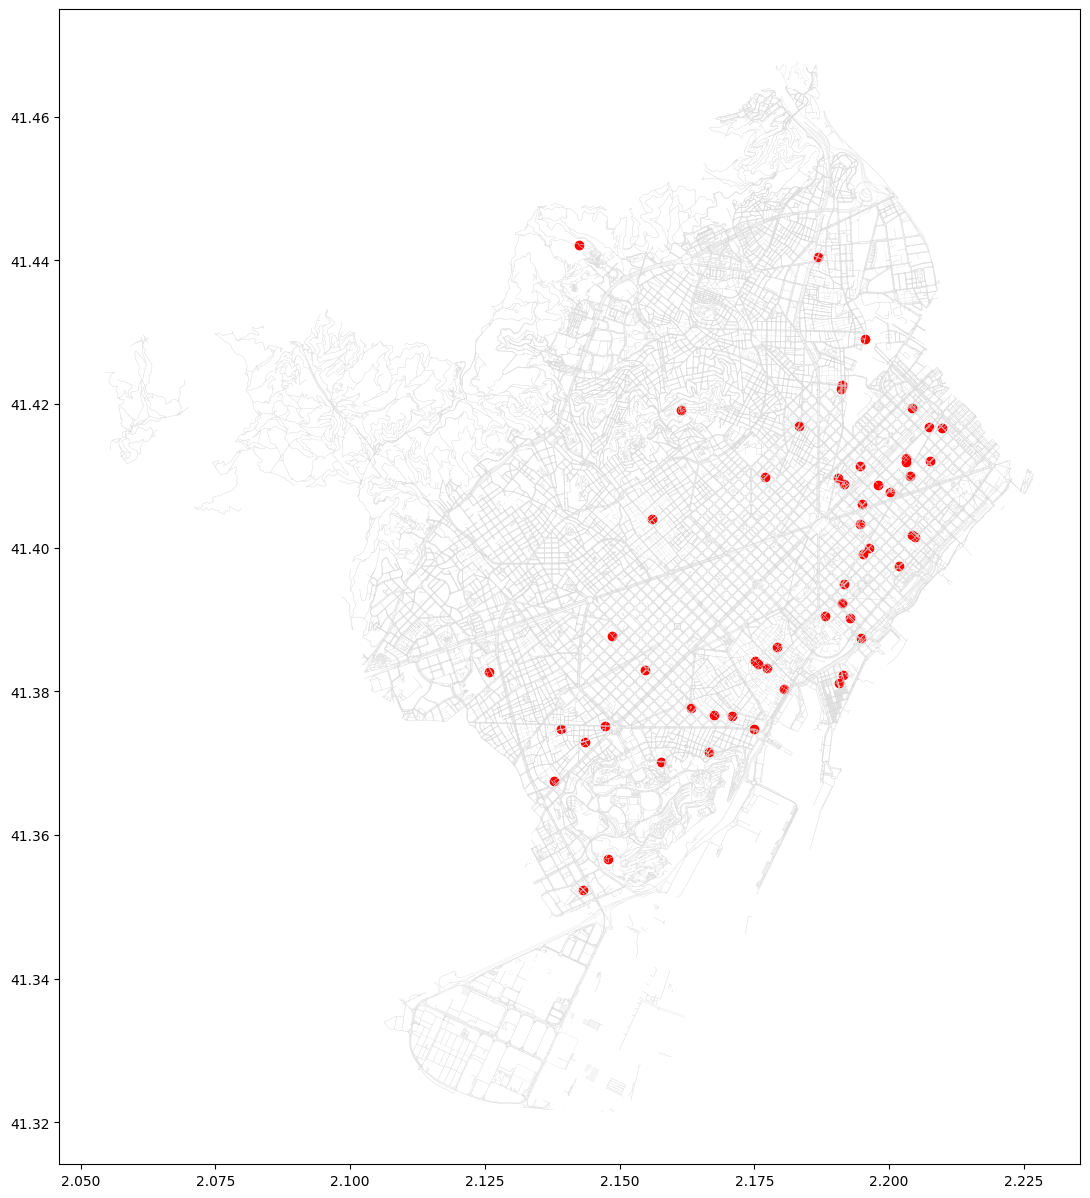

In [43]:
#check centers of isochrones on map
first_values_set = set(first_values)
mask = gdf_nodes.index.isin(first_values_set)
fig, ax = plt.subplots(figsize=(15, 15))
gdf_edges.plot(ax=ax, color='gainsboro', linewidth=0.2)
gdf_nodes[mask].plot(ax=ax, color='red')
plt.show()

In [44]:
for edge in G.edges(data=True):
    print(edge)
    break

(21638831, 1259351831, {'osmid': 23430836, 'name': "Passeig de l'Escullera", 'highway': 'service', 'oneway': False, 'reversed': False, 'length': 205.51, 'geometry': <LINESTRING (2.183 41.363, 2.182 41.362, 2.182 41.362, 2.182 41.362)>})


In [45]:
#average walking speed
speed = 1.42
for u, v, data in G.edges(data=True):
    data["time"] = data["length"]/speed
for edge in G.edges(data=True):
    print(edge)
    break

(21638831, 1259351831, {'osmid': 23430836, 'name': "Passeig de l'Escullera", 'highway': 'service', 'oneway': False, 'reversed': False, 'length': 205.51, 'geometry': <LINESTRING (2.183 41.363, 2.182 41.362, 2.182 41.362, 2.182 41.362)>, 'time': 144.72535211267606})


In [56]:
#walking in sec 
trip_times = [300,600,1200]
colors = ['#323232', '#646464', '#969696']

gdf_nodes["color"] = '#00000000'
gdf_nodes["size"] = 1

for trip_time, color in zip(trip_times, colors):
    for i in range(len(first_values)):
        subgraph = nx.ego_graph(G, first_values[i], radius=trip_time, distance='time')
    
        gdf_nodes["color"] = gdf_nodes.apply(lambda row: color if (row.name in list(subgraph.nodes()) and row["color"]=='#00000000') else row["color"], axis = 1)
        gdf_nodes["size"] = gdf_nodes.apply(lambda row: 15 if (row.name in list(subgraph.nodes()) and row["size"]==1) else row["size"], axis = 1)
    
#         print(len(list(subgraph.nodes())))
#         print(gdf_nodes[gdf_nodes["color"]==color].shape)
#         print(gdf_nodes["color"].value_counts())

264
(264, 8)
color
#00000000    78164
#323232        264
Name: count, dtype: int64
511
(775, 8)
color
#00000000    77653
#323232        775
Name: count, dtype: int64
380
(1155, 8)
color
#00000000    77273
#323232       1155
Name: count, dtype: int64
366
(1510, 8)
color
#00000000    76918
#323232       1510
Name: count, dtype: int64
390
(1900, 8)
color
#00000000    76528
#323232       1900
Name: count, dtype: int64
57
(1957, 8)
color
#00000000    76471
#323232       1957
Name: count, dtype: int64
318
(2081, 8)
color
#00000000    76347
#323232       2081
Name: count, dtype: int64
317
(2398, 8)
color
#00000000    76030
#323232       2398
Name: count, dtype: int64
304
(2467, 8)
color
#00000000    75961
#323232       2467
Name: count, dtype: int64
426
(2893, 8)
color
#00000000    75535
#323232       2893
Name: count, dtype: int64
431
(3200, 8)
color
#00000000    75228
#323232       3200
Name: count, dtype: int64
471
(3289, 8)
color
#00000000    75139
#323232       3289
Name: count, dtype: i

<Axes: >

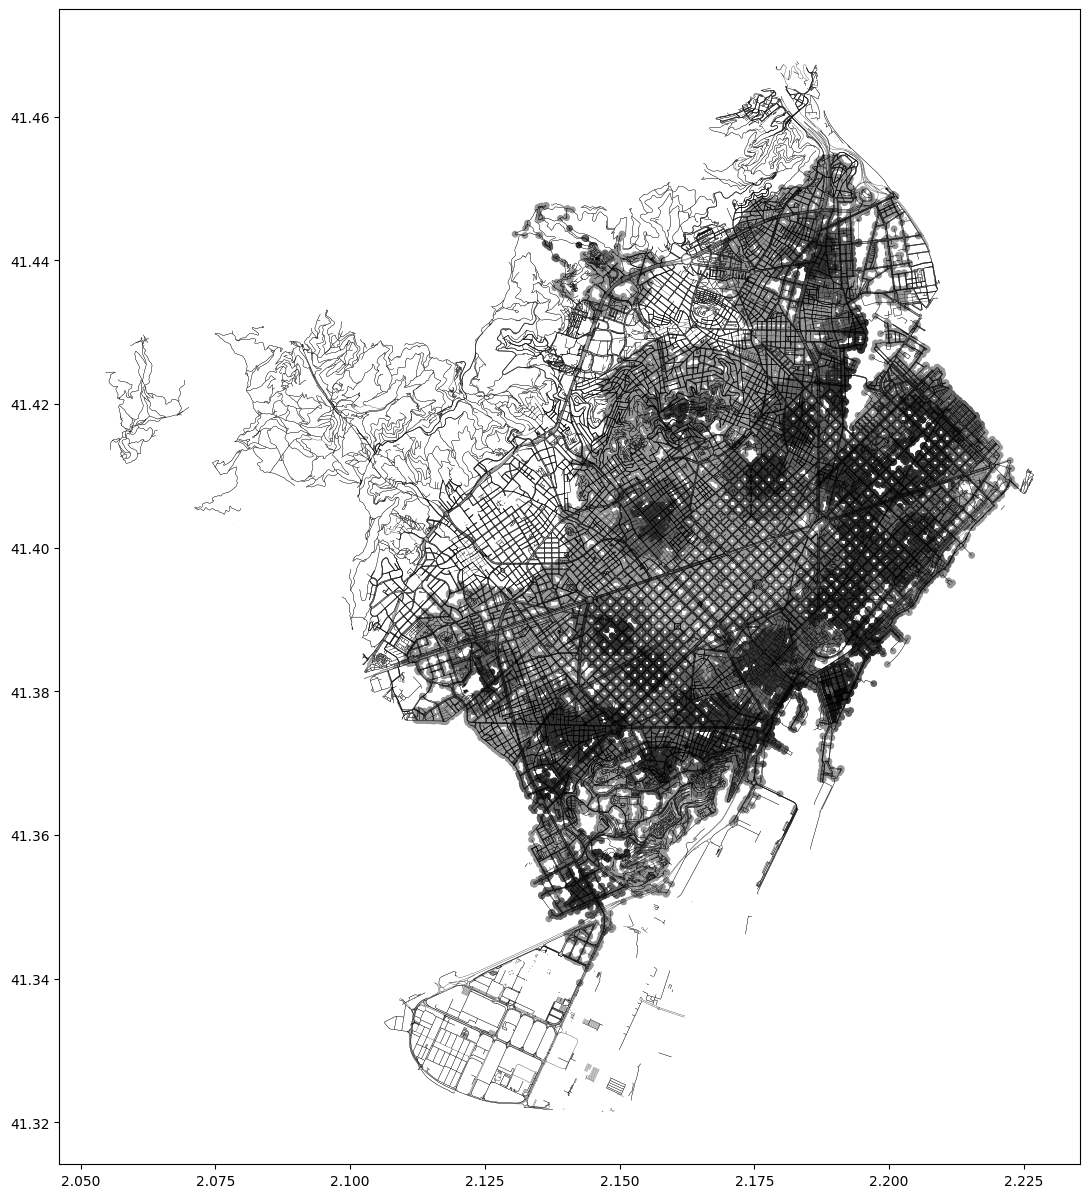

In [57]:
#plot isochrones nodes with white/black color range
fig, ax = plt.subplots(figsize=(15, 15))
gdf_edges.plot(ax=ax, color='#000000', linewidth=0.2)
gdf_nodes.plot(ax=ax, color=gdf_nodes["color"], markersize=gdf_nodes["size"])

<Axes: >

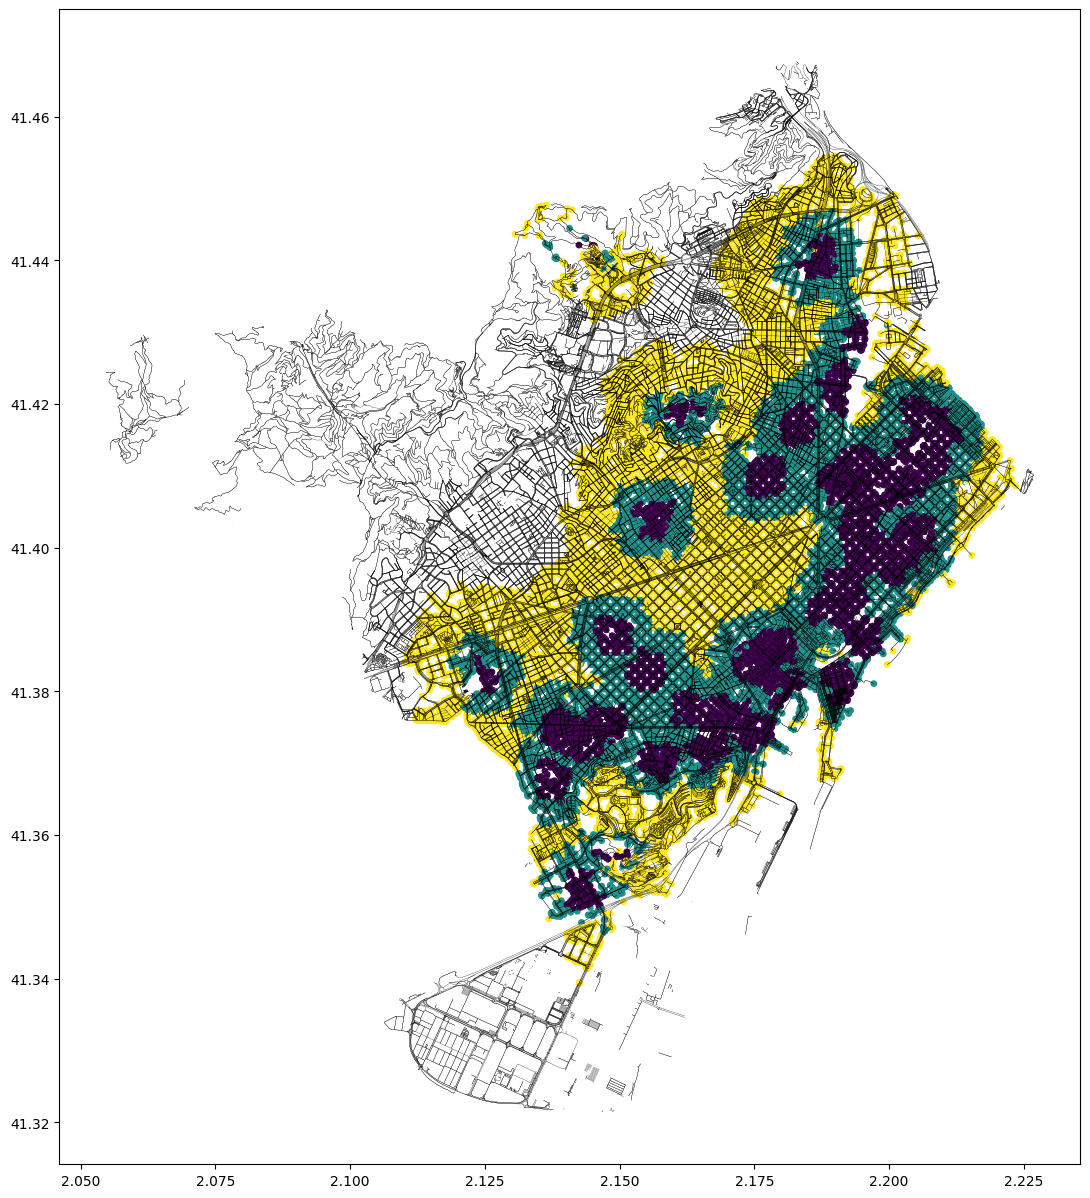

In [58]:
#plot isochrones nodes with diverse color range
colors = ox.plot.get_colors(n=len(trip_times), cmap='viridis', start=0, return_hex=True)
gdf_nodes["color"] = '#00000000'
gdf_nodes["size"] = 1

for trip_time, color in zip(trip_times, colors):
    for i in range(len(first_values)):
        subgraph = nx.ego_graph(G, first_values[i], radius=trip_time, distance='time')
        gdf_nodes["color"] = gdf_nodes.apply(lambda row: color if (row.name in list(subgraph.nodes()) and row["color"]=='#00000000') else row["color"], axis = 1)
        gdf_nodes["size"] = gdf_nodes.apply(lambda row: 15 if (row.name in list(subgraph.nodes()) and row["size"]==1) else row["size"], axis = 1)

fig, ax = plt.subplots(figsize=(15, 15))
gdf_edges.plot(ax=ax, color='#000000', linewidth=0.2)
gdf_nodes.plot(ax=ax, color=gdf_nodes["color"], markersize=gdf_nodes["size"])

<Axes: >

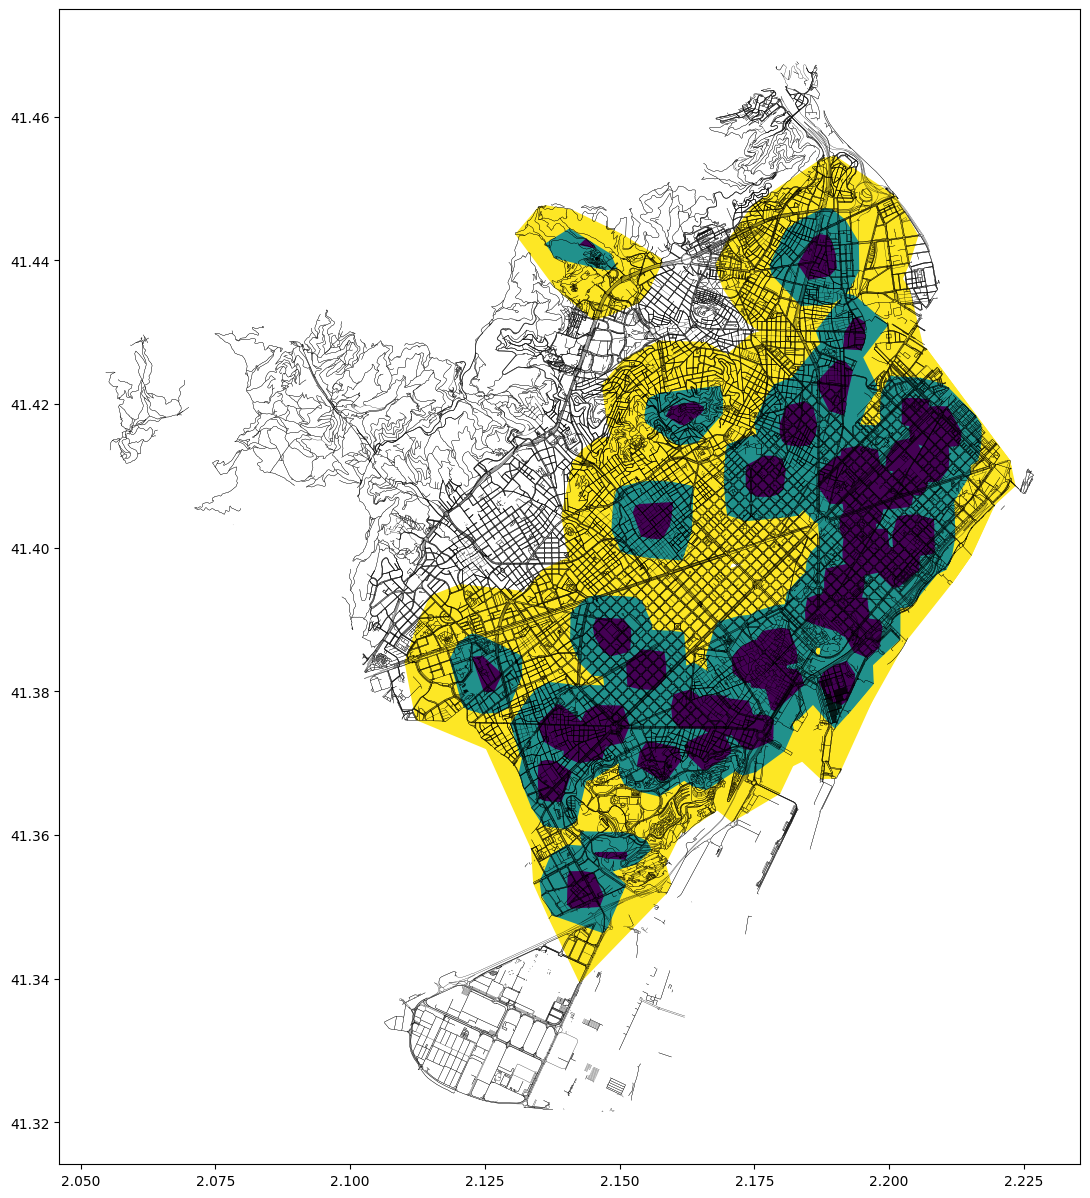

In [59]:
#make polygonized isochrones from convex hulls by nodes
gdf_polygons = []

for trip_time, color in zip(trip_times, colors):
    for i in range(len(first_values)):
        subgraph = nx.ego_graph(G, first_values[i], radius=trip_time, distance='time')
        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
        gdf_polygons.append({"geometry": bounding_poly, "color": color})
        
gdf_polygons = gpd.GeoDataFrame(data=gdf_polygons, crs=4326)
fig, ax = plt.subplots(figsize=(15, 15))
gdf_edges.plot(ax=ax, color='#000000', linewidth=0.2)
gdf_polygons[::-1].plot(ax=ax, color=gdf_polygons["color"])

In [61]:
gdf_polygons.to_file('C:/WORK_IAAC/submissions/Data Science III/datascience_III_src/BCN_heris.geojson',  driver='GeoJSON')

In [63]:
gdf_polygons['color'].unique()

array(['#440154', '#21918c', '#fde725'], dtype=object)

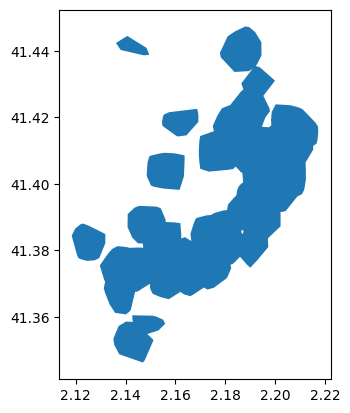

In [71]:
#Let's select 10-min walk isochrones for correlation with prices per sqm of homes
subset = gdf_polygons[gdf_polygons['color'] == '#21918c']
subset.plot()
plt.show()

In [93]:
#calculate prices in isochrones from prices day
gdfa=gpd.read_file('C:/WORK_IAAC/submissions/Data Science III/datascience_III_src/fotocasa_2018_3.shp')
gdfa.to_crs(4326, inplace=True)

gdfb = subset
gdfb.to_crs(4326, inplace=True)
# Create a column in gdfb to store the count of points inside each polygon
gdfb['AdvIn'] = gdfb.geometry.apply(lambda polygon: gdfa.within(polygon).sum())

# Create a function to calculate statistics while ignoring NaN values
def calculate_statistics(values):
    non_nan_values = values[~np.isnan(values)]
    if len(non_nan_values) > 0:
        minimum = np.min(non_nan_values)
        maximum = np.max(non_nan_values)
        median = np.median(non_nan_values)
        mean = np.mean(non_nan_values)
        average = np.average(non_nan_values)
    else:
        minimum = 0
        maximum = 0
        median = 0
        mean = 0
        average = 0
    return minimum, maximum, median, mean, average

# Create columns in gdfb to store the statistics
gdfb['MinPBA'], gdfb['MaxPBA'], gdfb['MedPBA'], gdfb['MeanPBA'], gdfb['AvePBA'] = zip(*gdfb.geometry.apply(
    lambda polygon: calculate_statistics(gdfa[gdfa.within(polygon)]['PriceByAre'].values)
))

gdfb.head()

C:\Users\rromu\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\rromu\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\rromu\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

geometry    color  AdvIn   
56  POLYGON ((2.17501 41.37815, 2.17110 41.37820, ...  #21918c    780  \
57  POLYGON ((2.20139 41.39585, 2.20133 41.39585, ...  #21918c    269   
58  POLYGON ((2.19364 41.38642, 2.18977 41.38745, ...  #21918c    158   
59  POLYGON ((2.19333 41.38113, 2.18698 41.38277, ...  #21918c     56   
60  POLYGON ((2.19467 41.39739, 2.19298 41.39748, ...  #21918c     88   

         MinPBA        MaxPBA       MedPBA      MeanPBA       AvePBA  
56  1500.000000  19266.055046  5114.285714  5520.163339  5520.163339  
57  2171.428571   9833.333333  4783.709411  4922.152650  4922.152650  
58  1235.632184  13263.157895  4417.808219  4769.623361  4769.623361  
59  3620.689655  13263.157895  5859.605911  6169.192568  6169.192568  
60  1235.632184   6470.588235  4205.663189  4184.541288  4184.541288

Text(0.5, 1.0, 'MEAN PRICES IN HERITAGE ZONES')

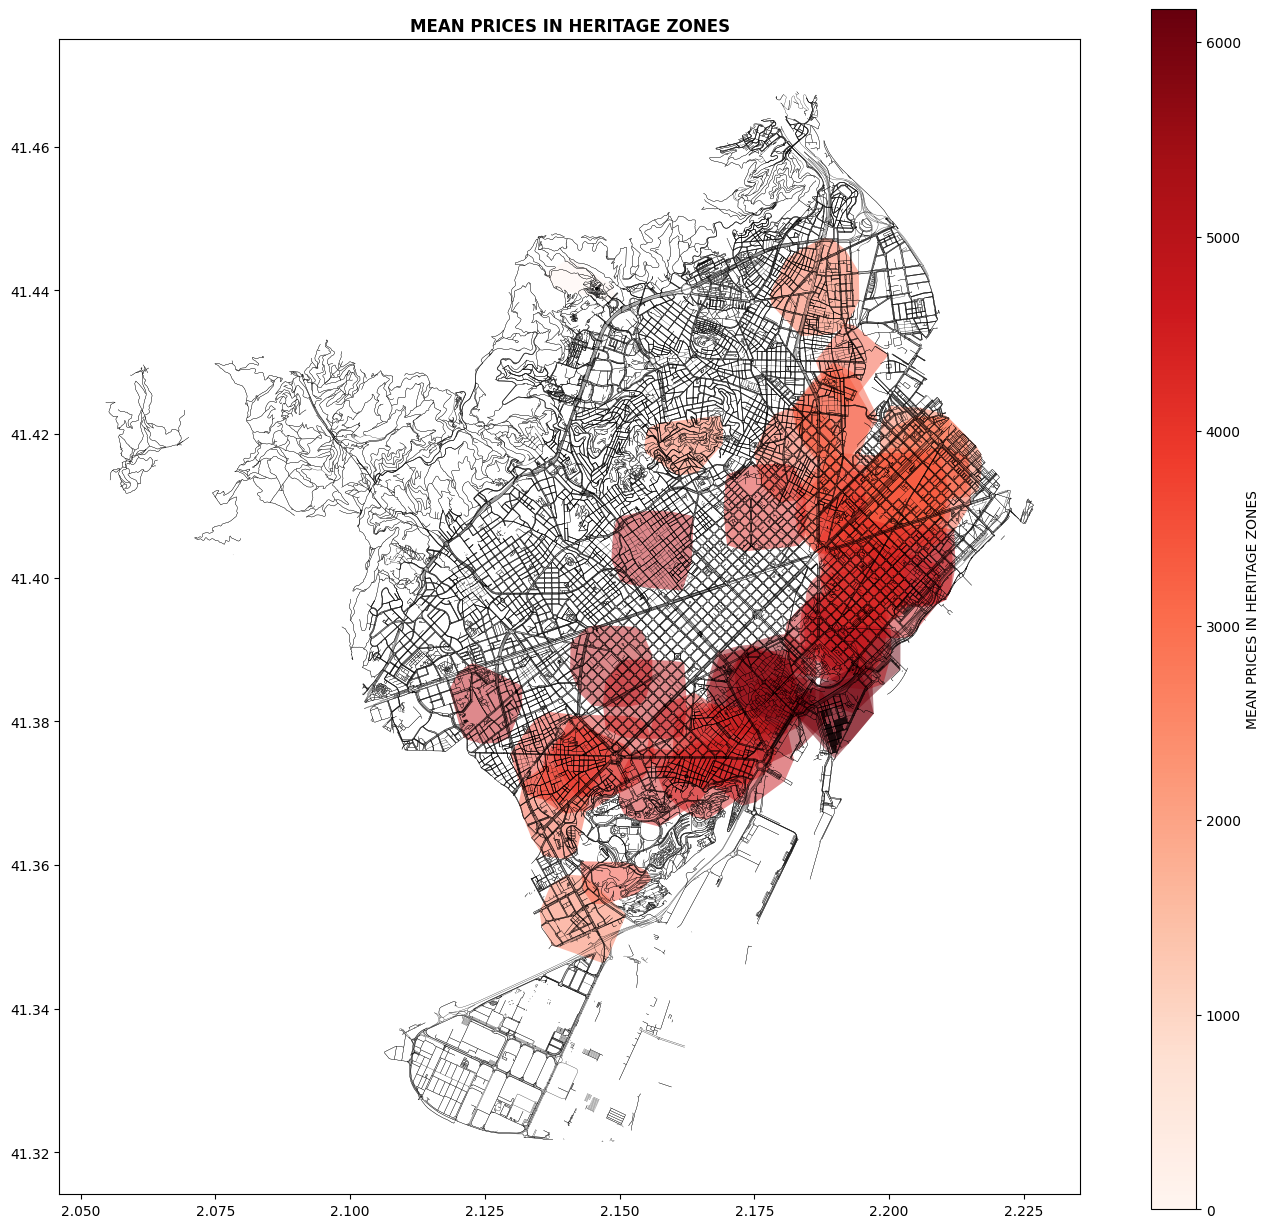

In [95]:
fig, ax = plt.subplots(figsize=(15, 15))
totcol = cm.Reds
gdf_edges.plot(ax=ax, color='#000000', linewidth=0.2)
gdfb.plot(column="MeanPBA", cmap=totcol, ax=ax, alpha=0.5)
# # Create a colorbar
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])

sm = plt.cm.ScalarMappable(cmap=totcol)
sm.set_array(gdfb['MeanPBA'])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label("MEAN PRICES IN HERITAGE ZONES")
ax.set_title("MEAN PRICES IN HERITAGE ZONES", fontsize=12, fontweight='bold')

In [ ]:
#we could improve this map with adding hertage polygon isochrones (isochrone-making actually take quite alot of time), but let's switch to the next part of analysis with heritage-like buildings.